Voting Classifier

I will be using COX BOX WITHOUT OUTLIERS DETECTED BY PYOD AND WITHOUT COLUMNS WITH HIGH CORRELATION

In [3]:
import pandas as pd
import numpy as np
import sklearn


In [4]:
#setting target
target="DEFAULT"

In [5]:
# columns to remove from EDA
columns_to_remove = ["T_CLOTHING_12","T_ENTERTAINMENT_12", "T_GROCERIES_12", "T_GROCERIES_6", "T_HEALTH_12", "T_TAX_12", "T_TAX_6", "T_TRAVEL_12", "T_TRAVEL_6","T_UTILITIES_12", "T_UTILITIES_6", "T_EXPENDITURE_12", "T_EXPENDITURE_6"]

In [7]:
# read data
df_train=pd.read_csv('../data/for_modelling/credit_score_train.csv')
df_val=pd.read_csv('../data/for_modelling/credit_score_valid.csv')
# map CAT_GAMBLING (No-0, Low-1, High-2)
df_train['CAT_GAMBLING'] = df_train['CAT_GAMBLING'].map({'No':0, 'Low':1, 'High':2})
df_val['CAT_GAMBLING'] = df_val['CAT_GAMBLING'].map({'No':0, 'Low':1, 'High':2})
# remove columns with high correlation
df_train.drop(columns=columns_to_remove, inplace=True)
df_val.drop(columns=columns_to_remove, inplace=True)
# remove outliers
from pyod.models.knn import KNN
clf = KNN(contamination=0.04)
rest_cols = [col for col in df_train.columns if col not in columns_to_remove]
# remove DEFAULT column
rest_cols.remove('DEFAULT')
clf.fit(df_train[rest_cols])
df_train['outliers'] = clf.labels_
# sum of outliers
df_train['outliers'].value_counts()

0    470
1     20
Name: outliers, dtype: int64

In [8]:
# remove outliers
df_train = df_train[df_train['outliers'] == 0]
df_train.drop(columns='outliers', inplace=True)
df_train.reset_index(drop=True, inplace=True)
df_train

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,R_CLOTHING_SAVINGS,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,2783,1855,0,0.6665,0.0000,0.0000,74,0.7184,0.0370,0.0555,...,2.5003,0.0000,0,0,0,0,1,0,570,0
1,314430,445442,707468,1.4167,2.2500,1.5882,29157,0.8131,0.1141,0.0805,...,0.5882,0.3704,2,1,0,1,1,0,691,0
2,161773,517674,2782496,3.2000,17.2000,5.3750,2533,0.6816,0.0230,0.0072,...,0.3125,0.0581,0,1,1,1,1,1,520,0
3,16014,97685,20818,6.1000,1.3000,0.2131,187,0.2936,0.0398,0.0065,...,0.1639,0.7692,0,1,0,0,1,0,654,0
4,193225,1410542,2589215,7.3000,13.4000,1.8356,2325,0.4407,0.0273,0.0037,...,0.1370,0.0746,0,1,1,0,1,1,552,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,20007,22508,457665,1.1250,22.8752,20.3334,861,0.5934,0.0725,0.0645,...,1.1111,0.0546,0,1,0,0,1,0,423,0
466,20846,268679,23162,12.8888,1.1111,0.0862,533,0.4094,0.0625,0.0048,...,0.0862,1.0000,1,1,0,0,1,0,584,0
467,89235,1106514,160623,12.4000,1.8000,0.1452,835,0.3460,0.0270,0.0022,...,0.0806,0.5556,0,1,0,0,1,0,631,0
468,197073,1021195,1863233,5.1818,9.4545,1.8246,3948,0.4691,0.0427,0.0082,...,0.1754,0.0962,2,1,0,1,1,1,572,0


In [9]:
#importing packeges for boxcox and standart scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from scipy.stats import boxcox

In [10]:
#setting X and Y
X=df_train.drop(target, axis=1)
y=df_train[target]
X_val=df_val.drop(target, axis=1)
y_val=df_val[target]
# Box Cox and standart scalling
for col in rest_cols:
    X[col] = boxcox(X[col]+1)[0]
    X_val[col] = boxcox(X_val[col]+1)[0]
X[rest_cols] = scaler.fit_transform(X[rest_cols])
X_val[rest_cols] = scaler.transform(X_val[rest_cols])

# AutoML

## TPOT

In [10]:
# installing tpot
#!pip install tpot

In [11]:
from tpot import TPOTClassifier

In [15]:
# setting up tpot
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X, y)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7425531914893616

Generation 2 - Current best internal CV score: 0.7446808510638298

Generation 3 - Current best internal CV score: 0.7446808510638298

Generation 4 - Current best internal CV score: 0.7489361702127659

Generation 5 - Current best internal CV score: 0.7489361702127659

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.6500000000000001, min_samples_leaf=8, min_samples_split=2, n_estimators=100)


TPOTClassifier(generations=5, population_size=50, random_state=42, verbosity=2)

In [17]:
# evaluating tpot
print("Accuracy on testing data: ", tpot.score(X_val, y_val))

Accuracy on testing data:  0.6086956521739131


## auto-sklearn  - głónie na linuxy

In [9]:
# installing auto-sklearn
!pip install auto-sklearn

  Using cached auto-sklearn-0.15.0.tar.gz (6.5 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [20 lines of output]
  Traceback (most recent call last):
    File "C:\Users\domin\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\Users\domin\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\domin\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_for_build_wheel
      return hook(config_settings)
             ^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\domin\AppData\Local\Temp\pip-build-env-1ne990os\overlay\Lib\site-packages\setuptools\build_meta.py", line 325, in get_requires_for_build_wheel
      return self._get_build_requires(co

In [19]:
from autosklearn.classification import AutoSklearnClassifier

ModuleNotFoundError: No module named 'autosklearn'

## H2O

In [10]:
# installing h2o
#!pip install h2o

  Obtaining dependency information for h2o from https://files.pythonhosted.org/packages/60/dc/8e9c694923a90ffd7e35d2cf0f2098779a39cfac8a88359997b6ecbfe3fe/h2o-3.46.0.1-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/265.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/265.6 MB 960.0 kB/s eta 0:04:37
   ---------------------------------------- 0.2/265.6 MB 2.9 MB/s eta 0:01:32
   ---------------------------------------- 0.5/265.6 MB 4.6 MB/s eta 0:00:59
   ---------------------------------------- 1.1/265.6 MB 6.7 MB/s eta 0:00:40
   ---------------------------------------- 1.7/265.6 MB 7.8 MB/s eta 0:00:35
   ---------------------------------------- 2.5/265.6 MB 9.3 MB/s eta 0:00:29
   ---------------------------------------- 3.3/265.6 MB 10.5 MB/s eta 0:00:25
    --------------------------------------- 3.9/265.6 MB 11.4 MB/s eta 0:00:23
    --------------------------------------- 3.9/265.6 MB 11.4 MB/s eta 0:00:23
    --------------------

In [12]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 17.0.8+9-LTS-211, mixed mode, sharing)
  Starting server from C:\Users\domin\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\domin\AppData\Local\Temp\tmp69o0qzm9
  JVM stdout: C:\Users\domin\AppData\Local\Temp\tmp69o0qzm9\h2o_domin_started_from_python.out
  JVM stderr: C:\Users\domin\AppData\Local\Temp\tmp69o0qzm9\h2o_domin_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Europe/Warsaw
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 3 days
H2O_cluster_name:,H2O_from_python_domin_jyfv7f
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.465 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


for h2o we need to have a dataset with our target column - it's a lot of work so I will skip this model

In [21]:
#setting up h2o
from h2o.automl import H2OAutoML
h2o_train = h2o.H2OFrame(df_train_h2o)
h20_automl = H2OAutoML(max_runtime_secs=3600, max_models=20, seed=1)
h20_automl.train(x=X_h2o, y=y_h2o, training_frame=h2o_train)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


H2OTypeError: Argument `y` should be an integer | string, got Series 0      0
1      0
2      0
3      0
4      0
      ..
465    0
466    0
467    0
468    0
469    0
Name: DEFAULT, Length: 470, dtype: int64

In [ ]:
# evaluating h2o


# XGBoost

In [23]:
# installing xgboost
#!pip install xgboost

In [11]:
import xgboost as xgb

In [12]:
#setting up xgboost
model_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.05, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, scale_pos_weight=1, seed=27, nthread=1)
model_xgb.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, nthread=1,
              num_parallel_tree=None, ...)

In [13]:
# evaluating xgboost
from sklearn.metrics import accuracy_score
predictions = model_xgb.predict(X_val)
print("Accuracy:", accuracy_score(y_val, predictions))

Accuracy: 0.6304347826086957


# Stacking

In [49]:
# installing scikit-learn
#!pip install scikit-learn

In [19]:
#importing models for stacking and setting up
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
level0 = [
    ('lr', LogisticRegression()),
    ('svc', SVC()),
    ('dt', DecisionTreeClassifier())
]
# Meta-model, który podsumowuje przewidywania bazowych modeli
level1 = LogisticRegression()

# Defining the stacking model
model_stacking = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

In [21]:
# fitting stacking and evaluating
model_stacking.fit(X, y)
predictions = model_stacking.predict(X_val)
print("Accuracy:", accuracy_score(y_val, predictions))

Accuracy: 0.5869565217391305


# Explainable AI

## SHAP

In [1]:
# installing shap
#!pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/39/6c/4ab39615fc3ffe40faaa62fc2feb43868b8ce946c671e84bf476c1e06116/shap-0.45.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for slicer==0.0.7 from https://files.pythonhosted.org/packages/78/c2/b3f55dfdb8af9812fdb9baf70cacf3b9e82e505b2bd4324d588888b81202/slicer-0.0.7-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/453.1 kB ? eta -:--:--
   ---------------------------- ----------- 317.4/453.1 kB 6.5 MB/s eta 0:00:01
   ---------------------------------------  450.6/453.1 kB 9.4 MB/s eta 0:00:01
   ---------------------------------------- 453.1/453.1 kB 3.5 MB/s eta 0:00:00


In [2]:
import shap

## setting up shap for different models

### xgboost

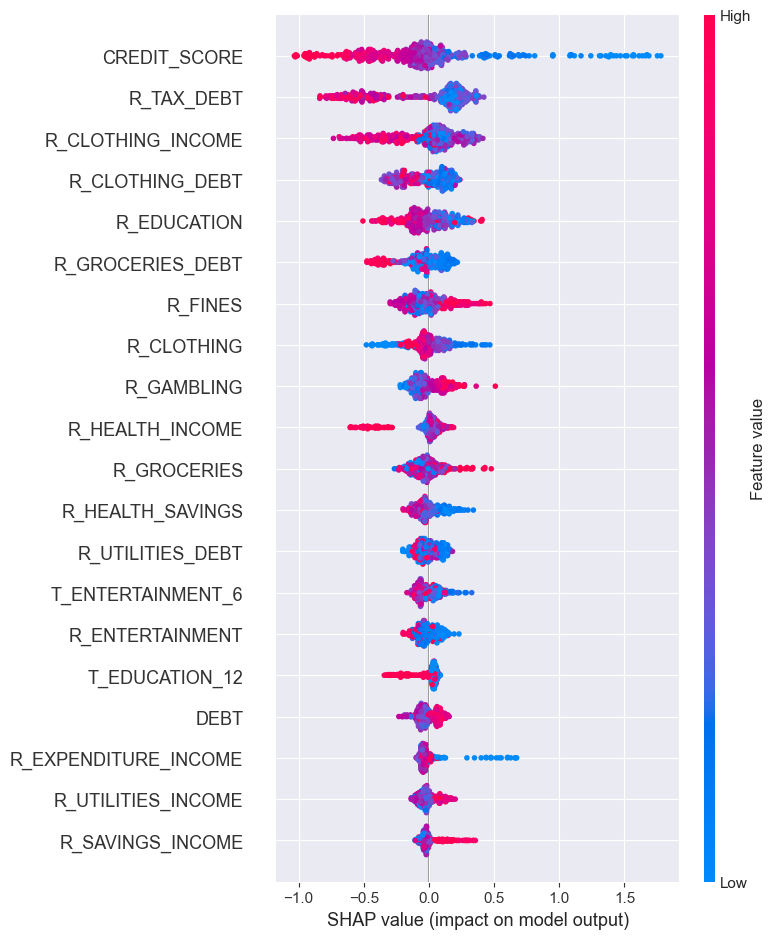

In [14]:
explainer_xgboost = shap.TreeExplainer(model_xgb)
shap_values_xgboost = explainer_xgboost.shap_values(X)
# visualize
shap.summary_plot(shap_values_xgboost, X)

### stacking

In [22]:
explainer_stacking = shap.TreeExplainer(model_stacking)
shap_values_stacking = explainer_stacking.shap_values(X)
# visualize
shap.summary_plot(shap_values_stacking, X)

InvalidModelError: Model type not yet supported by TreeExplainer: <class 'sklearn.ensemble._stacking.StackingClassifier'>